In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import openml as oml
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
from IPython.display import Markdown, display

In [3]:
sb.set(font_scale=2)
sb.set_style('white')

## Nepalese character recognition (5 points, 1+2+2)
The [Devnagari-Script dataset](https://www.openml.org/d/40923) contains 92,000 images (32x32 pixels) of 46 characters from Devanagari script. Your goal is to learn to recognize the right letter given the image.

In [4]:
devnagari = oml.datasets.get_dataset(40923)
X, y = devnagari.get_data(target=devnagari.default_target_attribute)

In [5]:
display(Markdown(devnagari.description))

**Author**: Prashnna K Gyawali, Shailesh Acharya, Ashok Pant  

**Source**: [Computer Vision Research Group, Nepal](https://web.archive.org/web/20160105230017/http://cvresearchnepal.com/wordpress/dhcd/), [Kaggle](https://www.kaggle.com/rishianand/devanagari-character-set)   

**Please cite**: Acharya S., Pant A.K., Gyawali P.K.,”Deep Learning based large scale handwritten Devanagari Character Recognition” Proceeding of 9th International Conference on Software, Knowledge, Information Management & Applications  



**Character Recognition for Devanagari Script**

Over 92 thousand images (32x32 pixels) of 46 characters from Devanagari script. Includes the alphabet as well as the numbers. Devanagari is an Indic script and forms a basis for over 100 languages spoken in India and Nepal including Hindi, Marathi, Sanskrit, and Maithili. It comprises of 47 primary alphabets, 14 vowels, and 33 consonants, and 10 

digits. In addition, the alphabets are modified when a vowel is added to a 

consonant. There is no capitalization of alphabets, unlike Latin languages.

In [6]:
X.shape

(92000, 1024)

# Part 1

1. Evaluate k-Nearest Neighbors, Logistic Regression and RandomForests with their default settings.
    - Take a stratified 10% subsample of the data.
    - Use the default train-test split and predictive accuracy. Is predictive accuracy a good scoring measure for this problem?
    - Try to build the same models on increasingly large samples of the dataset (e.g. 10%, 20%,...). Plot the training time and the predictive performance for each. Stop when the training time becomes prohibitively large (this will be different for different models). 

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
X_01, X_09, y_01, y_09 = train_test_split(X, y, train_size=0.1, stratify=y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_01, y_01, stratify=y_01)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Train and test

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train);

In [13]:
y_pred_lr = lr.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))

0.4865217391304348


In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

In [15]:
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))

0.731304347826087


In [16]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train);

In [17]:
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.7604347826086957


### Train time and predictive performance measurements

In [18]:
from time import time

In [19]:
def measure_training_time_performance(estimator_constructor, X, y, train_sizes=[0.1, 0.2, 0.3]):
    training_times = []
    accuracy_scores = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    for t_size in tqdm_notebook(train_sizes):
        X_train_subsample, _, y_train_subsample, _ = train_test_split(X_train, y_train, train_size=t_size, stratify=y_train)
        estimator = estimator_constructor()
        start_train = time()
        estimator.fit(X_train_subsample, y_train_subsample)
        end_train = time()
        training_times.append(end_train - start_train)
        accuracy_scores.append(accuracy_score(y_test, estimator.predict(X_test)))
    return training_times, accuracy_scores
        

In [20]:
def plot_training_times(train_sizes, train_times, name=None, label=None):
    plt.plot(train_sizes, train_times, '-o', label=label)
    if name:
        plt.title('{0} training'.format(name))
    plt.xlabel('Train set size')
    plt.ylabel('Training time')

In [21]:
def plot_prediction_accuracy(train_sizes, prediction_accuracies, name=None, label=None):
    plt.plot(train_sizes, prediction_accuracies, '-o', label=label)
    if name:
        plt.title('{0} prediction'.format(name))
    plt.xlabel('Training set size')
    plt.ylabel('Prediction accuracy')

In [22]:
train_sizes = [0.05, 0.1, 0.15, 0.2, 0.25]

#### LogisticRegression

In [23]:
lr_times, lr_scores = measure_training_time_performance(lambda: LogisticRegression(), X, y,
                                                        train_sizes=train_sizes)

Widget Javascript not detected.  It may not be installed or enabled properly.


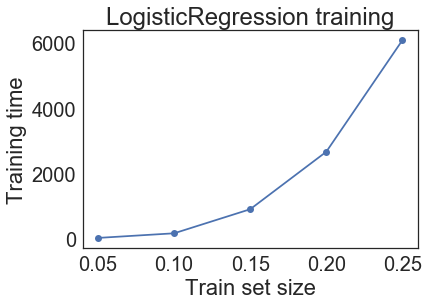

In [24]:
plot_training_times(train_sizes, lr_times, 'LogisticRegression')

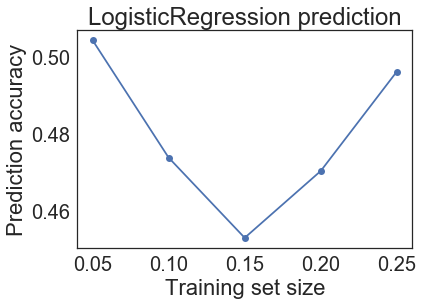

In [25]:
plot_prediction_accuracy(train_sizes, lr_scores, 'LogisticRegression')

#### KNN

In [26]:
knn_times, knn_scores = measure_training_time_performance(lambda: KNeighborsClassifier(), X, y,
                                              train_sizes=train_sizes)

Widget Javascript not detected.  It may not be installed or enabled properly.


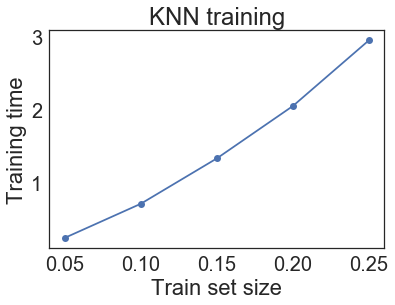

In [27]:
plot_training_times(train_sizes, knn_times, 'KNN')

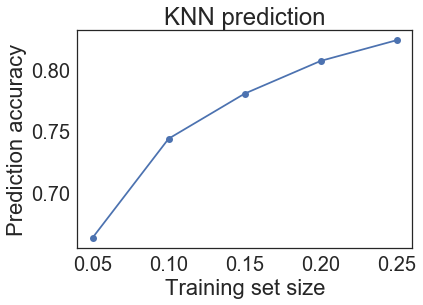

In [28]:
plot_prediction_accuracy(train_sizes, knn_scores, 'KNN')

#### RandomForest

In [29]:
rf_times, rf_scores = measure_training_time_performance(lambda: RandomForestClassifier(), X, y,
                                            train_sizes=train_sizes)

Widget Javascript not detected.  It may not be installed or enabled properly.


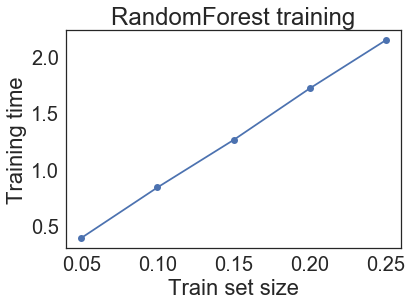

In [30]:
plot_training_times(train_sizes, rf_times, 'RandomForest')

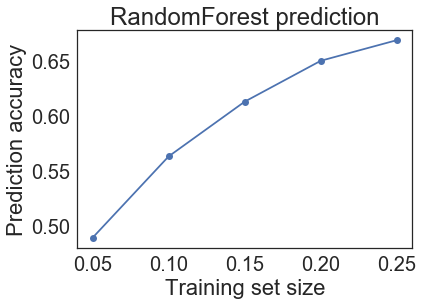

In [31]:
plot_prediction_accuracy(train_sizes, rf_scores, 'RandomForest')

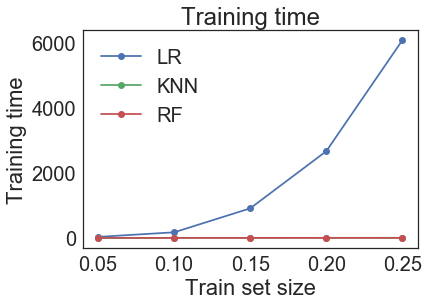

In [32]:
plot_training_times(train_sizes, lr_times, label='LR')
plot_training_times(train_sizes, knn_times, label='KNN')
plot_training_times(train_sizes, rf_times, label='RF')
plt.title('Training time')
plt.legend()

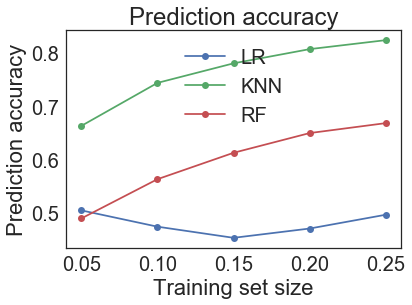

In [33]:
plot_prediction_accuracy(train_sizes, lr_scores, label='LR')
plot_prediction_accuracy(train_sizes, knn_scores, label='KNN')
plot_prediction_accuracy(train_sizes, rf_scores, label='RF')
plt.title('Prediction accuracy')
plt.legend()

# Part 2

2 . Optimize the value for the number of neighbors $k$ (keep $k$ < 50) and the number of trees (keep $n\_estimators$ < 100) on the stratified 10% subsample.
- Use 10-fold crossvalidation and plot $k$ and $n\_estimators$ against the predictive accuracy. Which value of $k$, $n\_estimators$ should you pick?

In [17]:
from sklearn.model_selection import GridSearchCV, KFold

### KNN n_neighbors optimisation

In [42]:
params_knn = {
    'n_neighbors': [1, 2, 3, 4] + list(range(5, 50, 10))
}

In [ ]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, params_knn, scoring='accuracy', n_jobs=-1, cv=KFold(10, True), verbose=10)
grid_knn.fit(X_01, y_01)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 15, 25, 35, 45]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [ ]:
grid_knn.best_score_

0.7944565217391304

In [ ]:
grid_knn.best_params_

{'n_neighbors': 1}

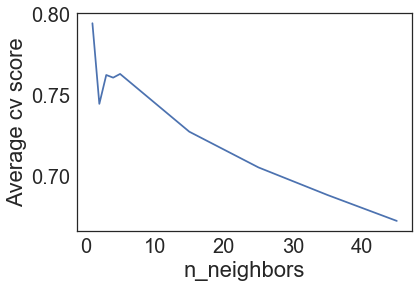

In [ ]:
plt.plot(params_knn['n_neighbors'], grid_knn.cv_results_['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Average cv accuracy')

For KNN best predictive performance on this dataset was achieved with `n_neighbors` parameter set to 1. Then for `n_neighbors` = 2 there was a drop in accuracy, which might have been caused by possibility of ties, then, for value 3 it went up again, for 4 and 5 was staying almost on the same level, and after that was dropping rapidly with the following increase of `n_neighbors`.


### RandomForest n_estimators optimization

In [15]:
params_rf = {
    'n_estimators': range(10, 110, 10)
}

In [18]:
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, params_rf, scoring='accuracy', n_jobs=-1, cv=KFold(10, True), verbose=10)
grid_rf.fit(X_01, y_01)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  2.1min remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(10, 110, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=10)

In [19]:
grid_rf.best_score_

0.7721739130434783

In [20]:
grid_rf.best_params_

{'n_estimators': 100}

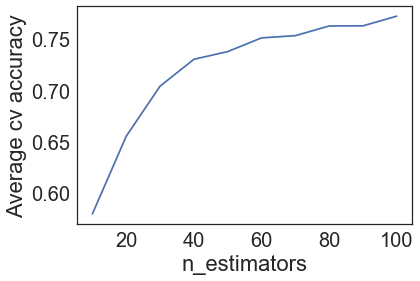

In [21]:
plt.plot(params_rf['n_estimators'], grid_rf.cv_results_['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('Average cv accuracy')

Predictive performance of RandomForest imporoves with the increase of `n_estimators` parameter, but improvements also slow down. Apart from that, there is a tradeoff between `n_estimators` parameter (and thus predictive quality) and model training and execution time.
This means that to get RandomForest model that is good for problem that is being solved `n_estimators` should be selected in such a way that:
- predictive performance is good enough;
- training time is low enough ("low enough" depends on the problem);
- model execution time (prediction) is low enough ("low enough" depends on the problem).

# Part 3

3 . For the RandomForest, optimize both $n\_estimators$ and $max\_features$ at the same time on the entire dataset.
- Use a nested cross-validation and a random search over the possible values, and measure the accuracy. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal performance you find?
- Hint: choose a nested cross-validation that is feasible. Don't use too many folds in the outer loop.
- Repeat the grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow ACC$ with ACC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold

In [26]:
from scipy.stats import randint

In [36]:
rf_random_params = {
    'n_estimators': randint(10, 100),
    'max_features': randint(10, 500),
}

In [37]:
rf = RandomForestClassifier()

In [38]:
rf_rs = RandomizedSearchCV(rf, rf_random_params, n_iter=1, n_jobs=-1, cv=KFold(10, True), verbose=10)

In [39]:
rf_rs_scores = cross_val_score(rf_rs, X, y, cv=KFold(3, True))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed: 13.2min remaining: 30.9min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed: 13.5min remaining: 13.5min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 13.5min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 21.9min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  9.5min remaining: 22.3min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  9.6min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  9.7min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 15.6min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   16.7s remaining:   39.1s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   19.9s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   20.8s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.5s finished


In [ ]:
#15:06

In [40]:
rf_rs_scores.mean()

0.8505755202798934

In [ ]:
rf_grid_params = {
    'n_estimators': range(10, 200, 20),
    'max_features': range(10, 300, 20),
}

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_grid = GridSearchCV(rf, rf_grid_params, n_jobs=-1, cv=KFold(10, True), verbose=10)

In [ ]:
rf_grid.fit(X, y)

In [ ]:
rf_grid.best_score_

In [ ]:
rf_cv_df = pd.DataFrame()
rf_cv_df['n_estimators'] = rf_grid.cv_results_['param_n_estimators'].data
rf_cv_df['max_features'] = rf_grid.cv_results_['param_max_features'].data
rf_cv_df['accuracy'] = rf_grid.cv_results_['mean_test_score']

In [ ]:
sb.heatmap(rf_cv_df.pivot('n_estimators', 'max_features', 'accuracy'), xticklabels=False, yticklabels=False)